## Importacion de Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import load_model

## Importacion del Modelo

In [2]:
model= load_model("best_model.keras")

## Carga Desde el DataSet

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\jesus\OneDrive\Escritorio\Education\Samsung Inovation Campus\Clases\Asignaciones\Semana 7\Quizz\pandas_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


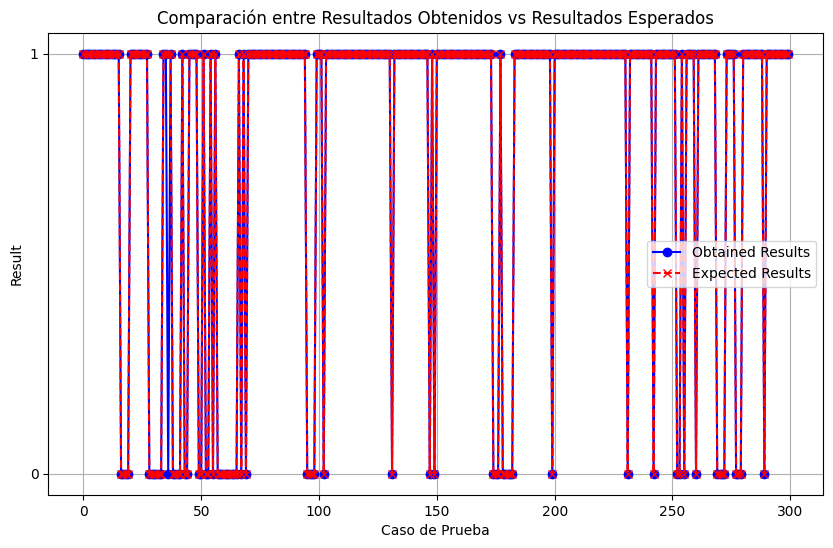

In [6]:
# Cargar los datos
training_df = pd.read_csv('Training Records.csv')
testing_df = pd.read_csv('Test Records.csv')

# Escalado de entradas utilizando los datos de entrenamiento
scaler = StandardScaler()
scaler.fit(training_df[['Temperature', 'D.O','pH','Conductivity', 'B.O.D','Nitrate', 'Fecalcaliform','Totalcaliform']])

# Transformar los datos de prueba
input_data = testing_df[['Temperature', 'D.O','pH','Conductivity', 'B.O.D','Nitrate', 'Fecalcaliform','Totalcaliform']].to_numpy()
input_data_scaled = scaler.transform(input_data) 

# Predicción
resultado = model.predict(input_data_scaled)
resultado_entero = (resultado >= 0.5).astype(int)

# Obtener los resultados esperados
obtained_results = resultado_entero.tolist()
expected_results = testing_df['class'].tolist()

# Crear un DataFrame con los resultados
data = {
    'Obtained Results': obtained_results,
    'Expected Results': expected_results
}
df = pd.DataFrame(data)

# Guardar el DataFrame como JSON
df.to_json('resultados.json', orient='records', lines=True)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(obtained_results, marker='o', linestyle='-', color='b', label='Obtained Results')
plt.plot(expected_results, marker='x', linestyle='--', color='r', label='Expected Results')
plt.title('Comparación entre Resultados Obtenidos vs Resultados Esperados')
plt.xlabel('Caso de Prueba')
plt.ylabel('Result')
plt.yticks([0, 1])
plt.legend()
plt.grid(True)
plt.show()